In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
sns.set_style("whitegrid")

In [19]:
data = {}
stats = {}
data['1_1_1'] = pd.read_csv('results/a2c_0_50/1_1_1/summary.csv')[['lateral_collisions', 'rear_end_collisions', 'speed', 'number_of_cars']]
data['0.5_2_1.2'] = pd.read_csv('results/a2c_0_50/0.5_2_1.2/summary.csv')[['lateral_collisions', 'rear_end_collisions', 'speed', 'number_of_cars']]

full_data = pd.concat([df.assign(identity=k.split('_')[-1]) for k,df in data.items()])

/Users/finn/miniconda3/envs/ps-safe-rl/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/finn/miniconda3/envs/ps-safe-rl/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/finn/miniconda3/envs/ps-safe-rl/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/finn/miniconda3/envs/ps-safe-rl/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


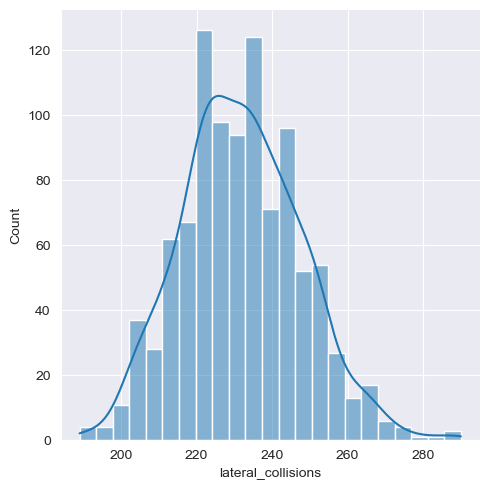

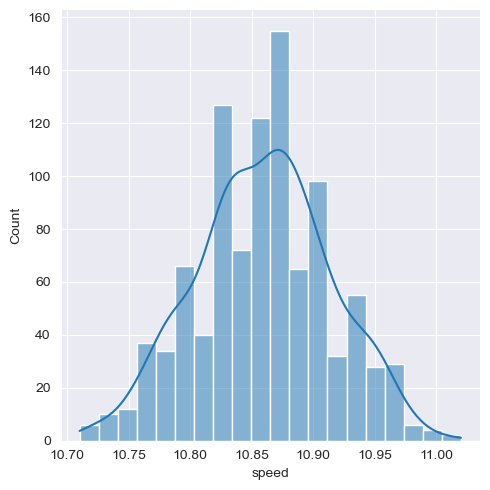

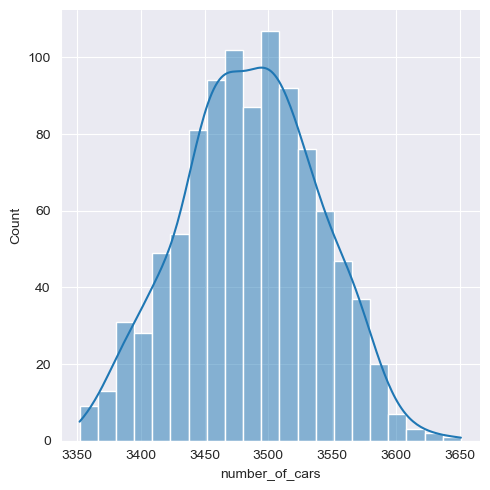

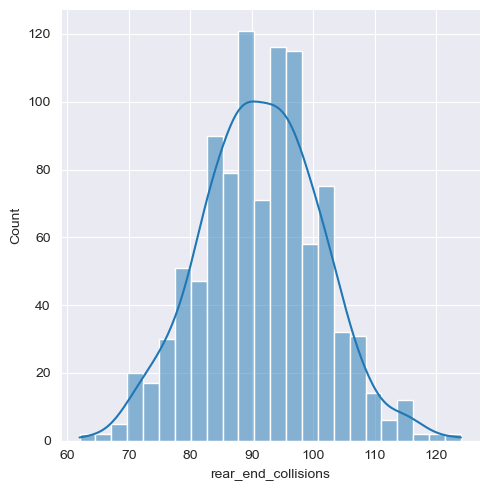

In [10]:
sns.displot(data['1_1_1'], x='lateral_collisions', kde=True)
sns.displot(data['1_1_1'], x='speed', kde=True)
sns.displot(data['1_1_1'], x='number_of_cars', kde=True)
sns.displot(data['1_1_1'], x='rear_end_collisions', kde=True)

In [32]:
stats['1_1_1']=pd.DataFrame()
stats['1_1_1']["mean"]=data['1_1_1'].mean()
stats['1_1_1']["Std.Dev"]=data['1_1_1'].std()
stats['1_1_1']["Var"]=data['1_1_1'].var()

stats['1_1_1'].T

,lateral_collisions,rear_end_collisions,speed,number_of_cars
mean,231.856000,91.509000,10.859330,3485.724000
Std.Dev,15.936224,9.726691,0.054890,53.278142
Var,253.963227,94.608528,0.003013,2838.560384


In [33]:
stats['0.5_2_1.2']=pd.DataFrame()
stats['0.5_2_1.2']["mean"]=data['0.5_2_1.2'].mean()
stats['0.5_2_1.2']["Std.Dev"]=data['0.5_2_1.2'].std()
stats['0.5_2_1.2']["Var"]=data['0.5_2_1.2'].var()

stats['0.5_2_1.2'].T

,lateral_collisions,rear_end_collisions,speed,number_of_cars
mean,237.177000,120.516000,10.507990,4181.619000
Std.Dev,16.585679,11.373702,0.048872,54.776257
Var,275.084756,129.361105,0.002388,3000.438277


/Users/finn/miniconda3/envs/ps-safe-rl/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


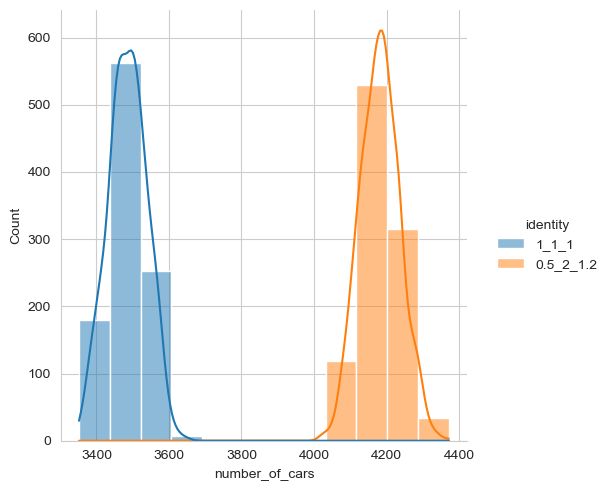

In [47]:
sns.displot(full_data, x='number_of_cars', hue='identity', kde=True)

In [43]:
scipy.stats.ttest_ind(data['1_1_1']['lateral_collisions'], data['1_1_1']['rear_end_collisions'])

Ttest_indResult(statistic=237.715246583378, pvalue=0.0)

In [46]:
scipy.stats.ttest_ind(data['1_1_1']['lateral_collisions'], data['0.5_2_1.2']['lateral_collisions'])

Ttest_indResult(statistic=-7.315528851371293, pvalue=3.6937825162626337e-13)

In [45]:
scipy.stats.ttest_ind(data['1_1_1']['rear_end_collisions'], data['0.5_2_1.2']['rear_end_collisions'])

Ttest_indResult(statistic=-61.292628486145176, pvalue=0.0)